In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#verify that weather api key was imported
weather_api_key

'7961218138873b4ab5ae7233425f7eaa'

In [2]:
# get total production data 
total_production_by_ctry_path = "data/total-production.csv"

#read csv file and convert into dataframe
total_df = pd.read_csv(total_production_by_ctry_path)
total_df.head()

,total_production (1k 60kg bags),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001


In [3]:
# get quality data frm Kaggle Dataset
coffee_qlty_by_ctry_path = "data/Coffee_Qlty_By_Country.csv"

#read csv file containing coffee data and convert into dataframe 
# 33 countries in this dataframe
quality_df = pd.read_csv(coffee_qlty_by_ctry_path)
quality_df.head()

,Country.of.Origin,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,AVG_Category.One.Defects,AVG_Category.Two.Defects,Rec_Cnt
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,0.128788,3.598485,132
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,0.000000,2.500000,2
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,0.094375,0.500000,0.000000,4.000000,16
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,0.062022,0.207650,0.377049,1.939891,183
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,0.083333,0.117647,0.352941,2.823529,51


In [4]:
# removing moisture, quakers, defects and record count so we can get a clean average quality
# The deleted values are pertinent but do not contribute to a mean calculation

quality_df =quality_df.drop(['AVG_Moisture', 'AVG_Quakers', 'AVG_Category.One.Defects', 'AVG_Category.Two.Defects', 'Rec_Cnt'], axis=1)



In [5]:
# compute avg quality

avg_quality = quality_df.mean(numeric_only = True, axis = 1)
# add avg quality to dataframe
avg_quality_df = quality_df
avg_quality_df['Avg_Quality'] = avg_quality
# show the dataframe
avg_quality_df.head()

,Country.of.Origin,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,Avg_Quality
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,8.315833
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,8.249444
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,8.364861
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,8.387250
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,8.347298


In [6]:
# eliminating all but the avg quality and country of original
ranked_quality_df = avg_quality_df[["Country.of.Origin", "Avg_Quality"]]

#ranking by avg quality
ranked_quality_df = ranked_quality_df.sort_values(('Avg_Quality'), ascending = False)
rename_ranked_quality_df = ranked_quality_df.rename(columns = {'Country.of.Origin' : 'Country'})
# show the ranked, sorted dataframe
rename_ranked_quality_df.head()

,Country,Avg_Quality
23,Papua New Guinea,8.646667
8,Ethiopia,8.603939
15,Kenya,8.510533
14,Japan,8.508889
22,Panama,8.451111


In [7]:
#compute avg total production over all covered years
avg_production = total_df.mean(numeric_only = True, axis = 1)

#add avg production to dataframe and rename
avg_total_df = total_df
avg_total_df['Avg_Production'] = avg_production

#show the dataframe
# 51 rows here, 33 in the quality dataframe
avg_total_df.head()

,total_production (1k 60kg bags),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Avg_Production
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874,45.256048
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687,116.146128
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836,41067.783976
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206,350.172424
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001,1076.504352


In [21]:
# eliminating all but the avg quality and country of original
ranked_total_df = avg_total_df[["total_production (1k 60kg bags)", "Avg_Production"]]

# renaming the data now that it is clean
rename_ranked_total_df = ranked_total_df.rename(columns = {'total_production (1k 60kg bags)': 'Country', 'Avg_Production' : 'Avg_production in 1k 60kg bags'})
# ranking by avg quality
rename_ranked_total_df = rename_ranked_total_df.sort_values(('Avg_production in 1k 60kg bags'), ascending = False)
# show the ranked, sorted dataframe
rename_ranked_total_df

,Country,Avg_production in 1k 60kg bags
2,Brazil,41067.783976
54,Viet Nam,15156.584548
24,Colombia,11926.601600
5,Indonesia,8452.302438
30,Ethiopia,4880.789417
37,India,4552.609690
42,Mexico,4376.146438
33,Guatemala,3910.381731
36,Honduras,3636.434097
52,Uganda,3211.943759


In [18]:
#take top 33 producers to match the 33 rows in the quality dataframe
production_sub_df = rename_ranked_total_df.head(33)
production_sub_df

,Country,Avg_production in 1k 60kg bags
2,Brazil,41067.783976
54,Viet Nam,15156.584548
24,Colombia,11926.601600
5,Indonesia,8452.302438
30,Ethiopia,4880.789417
37,India,4552.609690
42,Mexico,4376.146438
33,Guatemala,3910.381731
36,Honduras,3636.434097
52,Uganda,3211.943759


In [20]:
# merge the quality and total production databases
combined_df = pd.merge(production_sub_df, rename_ranked_quality_df, how = 'inner')
combined_df

,Country,Avg_production in 1k 60kg bags,Avg_Quality
0,Brazil,41067.783976,8.315833
1,Colombia,11926.601600,8.387250
2,Indonesia,8452.302438,8.349556
3,Ethiopia,4880.789417,8.603939
4,India,4552.609690,8.147698
5,Mexico,4376.146438,8.175127
6,Guatemala,3910.381731,8.272830
7,Honduras,3636.434097,8.018700
8,Uganda,3211.943759,8.412654
9,Peru,2923.816221,8.324889


The r-value is 0.09454665703064204


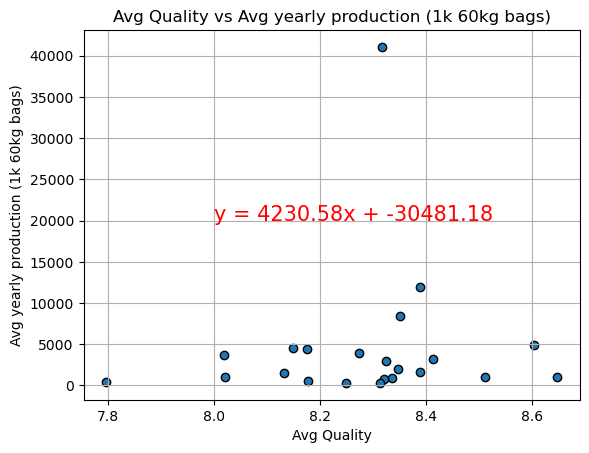

In [34]:
# Build the scatter plots for latitude vs. humidity
x_values = combined_df['Avg_Quality']
y_values = combined_df['Avg_production in 1k 60kg bags']
plt.scatter(x_values, y_values , alpha = 1, edgecolors = "k")

# Incorporate the other graph properties
plt.xlabel("Avg Quality")
plt.ylabel("Avg yearly production (1k 60kg bags)")
plt.title(f"Avg Quality vs Avg yearly production (1k 60kg bags)")
plt.grid(True)
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,20000),fontsize=15,color="red")
# Save the figure
plt.savefig("output_data/Fig1.png")
print(f'The r-value is {rvalue}')
# Show plot
plt.show()